In order to start building the model, we need all of these imports. Don't forget to run the cell below to continue working with the model.

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from efficientnet.tfkeras import EfficientNetB3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download The Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle_PlantGenius.json to kaggle_PlantGenius.json


{'kaggle_PlantGenius.json': b'{"username":"tanukii","key":"280670390ec86a16e6dc4906c207de8d"}'}

In [ ]:
# Path file kaggle_PG.json
kaggleJsonPath = '/content/kaggle_PlantGenius.json'

# Direktori untuk menyimpan file kaggle.json
kaggleDir = os.path.expanduser('~/.kaggle')

# Membuat direktori jika belum ada
os.makedirs(kaggleDir, exist_ok=True)

# Menyalin file kaggle_PG.json ke direktori ~/.kaggle dengan nama kaggle.json
shutil.copyfile(kaggleJsonPath, os.path.join(kaggleDir, 'kaggle.json'))

# Mengatur izin file kaggle.json
os.chmod(os.path.join(kaggleDir, 'kaggle.json'), 0o600)

In [ ]:
!kaggle datasets download -d tanukii/plantgeniusdataset

100% 1.47G/1.47G [00:19<00:00, 138MB/s]
100% 1.47G/1.47G [00:19<00:00, 79.9MB/s]


In [ ]:
!unzip -qq /content/plantgeniusdataset.zip

# Count and View Images

In this section, we will count the number of images in each disease's and show the sample of each of them. First, we will define the directories of each disease for training, validation, and testing set.

In [ ]:
#Define the directories
train_dir = '/content/Plant GeniuS Dataset/train/'
valid_dir = "/content/Plant GeniuS Dataset/valid/"
test_dir = "/content/Plant GeniuS Dataset/test/"

train_Banana_cordana_dir = os.path.join(train_dir, "Banana_cordana")
train_Banana_healthy_dir = os.path.join(train_dir, "Banana_healthy")
train_Banana_pestalotiopsis_dir = os.path.join(train_dir, "Banana_pestalotiopsis")
train_Banana_sigatoka_dir = os.path.join(train_dir, "Banana_sigatoka")
train_Cacao_black_pod_rot_dir = os.path.join(train_dir, "Cacao___black_pod_rot")
train_Cacao_healthy_dir = os.path.join(train_dir, "Cacao___healthy")
train_Cacao_pod_borer_dir = os.path.join(train_dir, "Cacao___pod_borer")
train_Cassava_Brown_Leaf_Spot_dir = os.path.join(train_dir, "Cassava___Brown_Leaf_Spot")
train_Cassava_Brown_Streak_Disease_dir = os.path.join(train_dir, "Cassava___Brown_Streak_Disease")
train_Cassava_Green_Mottle_dir = os.path.join(train_dir, 'Cassava___Green_Mottle')
train_Cassava_healthy_dir = os.path.join(train_dir, 'Cassava___Healthy')
train_Cassava_Mosaic_Disease_dir = os.path.join(train_dir, 'Cassava___Mosaic_Disease')
train_Cassava_Resistance_Marker_dir = os.path.join(train_dir, 'Cassava___Resistance_Marker')
train_Coffee_Cerscospora_dir = os.path.join(train_dir,'Coffee___Cerscospora')
train_Coffee_healthy_dir = os.path.join(train_dir, 'Coffee___Healthy')
train_Coffee_Leaf_rust_dir = os.path.join(train_dir, 'Coffee___Leaf rust')
train_Coffee_Miner_dir = os.path.join(train_dir, 'Coffee___Miner')
train_Coffee_Phoma_dir = os.path.join(train_dir, "Coffee___Phoma")
train_Corn_Cercospora_leaf_spot_dir = os.path.join(train_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
train_Corn_Common_rust_dir = os.path.join(train_dir, "Corn_(maize)___Common_rust_")
train_Corn_Gray_Leaf_Spot_dir = os.path.join(train_dir, "Corn___Gray_Leaf_Spot")
train_Corn_healthy_dir = os.path.join(train_dir, "Corn_(maize)___healthy")
train_Corn_Northern_Leaf_Blight_dir = os.path.join(train_dir, "Corn_(maize)___Northern_Leaf_Blight")
train_Guava_Canker_dir = os.path.join(train_dir, "Guava___Canker")
train_Guava_Dot_dir = os.path.join(train_dir, "Guava___Dot")
train_Guava_Healthy_dir = os.path.join(train_dir, 'Guava___Healthy')
train_Guava_Mummification_dir = os.path.join(train_dir, 'Guava___Mummification')
train_Guava_Rust_dir = os.path.join(train_dir, 'Guava___Rust')
train_Mango_Anthracnose_dir = os.path.join(train_dir, 'Mango___Anthracnose')
train_Mango_Bacterial_Canker_dir = os.path.join(train_dir,'Mango___Bacterial_Canker')
train_Mango_Cutting_Weevil_dir = os.path.join(train_dir, 'Mango___Cutting_Weevil')
train_Mango_Die_Back_dir = os.path.join(train_dir, 'Mango___Die_Back')
train_Mango_Gall_Midge_dir = os.path.join(train_dir, 'Mango___Gall_Midge')
train_Mango_Healthy_dir = os.path.join(train_dir, "Mango___Healthy")
train_Mango_Powdery_Mildew_dir = os.path.join(train_dir, "Mango___Powdery_Mildew")
train_Mango_Sooty_Mould_dir = os.path.join(train_dir, "Mango___Sooty_Mould")
train_Orange_Haunglongbing_dir = os.path.join(train_dir, "Orange___Haunglongbing_(Citrus_greening)")
train_Potato_Early_blight_dir = os.path.join(train_dir, "Potato___Early_blight")
train_Potato_healthy_dir = os.path.join(train_dir, "Potato___healthy")
train_potato_hollow_heart_dir = os.path.join(train_dir, "potato___hollow_heart")
train_Potato_Late_blight_dir = os.path.join(train_dir, "Potato___Late_blight")
train_Rice_Bacterial_leaf_blight_dir = os.path.join(train_dir, 'Rice___Bacterial_leaf_blight')
train_Rice_BrownSpot_dir = os.path.join(train_dir, 'Rice___BrownSpot')
train_Rice_Healthy_dir = os.path.join(train_dir, 'Rice___Healthy')
train_Rice_Hispa_dir = os.path.join(train_dir, 'Rice___Hispa')
train_Rice_LeafBlast_dir = os.path.join(train_dir, 'Rice___LeafBlast')
train_Rice_sogatella_dir = os.path.join(train_dir, 'Rice Sogatella')
train_Rice_Tungro_dir = os.path.join(train_dir, 'Rice Tungro')
train_Soybean_healthy_dir = os.path.join(train_dir, 'Soybean___healthy')
train_Squash_Powdery_mildew_dir = os.path.join(train_dir, "Squash___Powdery_mildew")
train_Tea_algal_leaf_dir = os.path.join(train_dir, "Tea___algal_leaf")
train_Tea_Anthracnose_dir = os.path.join(train_dir, "Tea___Anthracnose")
train_Tea_brown_blight_dir = os.path.join(train_dir, "Tea___brown_blight")
train_Tea_gray_light_dir = os.path.join(train_dir, "Tea___gray_light")
train_Tea_healthy_dir = os.path.join(train_dir, "Tea___healthy")
train_Tea_helopeltis_dir = os.path.join(train_dir, "Tea___helopeltis")
train_Tea_red_leaf_spot_dir = os.path.join(train_dir, "Tea___red_leaf_spot")
train_Tea_white_spot_dir = os.path.join(train_dir, 'Tea___white_spot')
train_Tomato_Bacterial_spot_dir = os.path.join(train_dir, 'Tomato___Bacterial_spot')
train_Tomato_Early_blight_dir = os.path.join(train_dir, 'Tomato___Early_blight')
train_Tomato_healthy_dir = os.path.join(train_dir, 'Tomato___healthy')
train_Tomato_Late_blight_dir = os.path.join(train_dir,'Tomato___Late_blight')
train_Tomato_Leaf_Mold_dir = os.path.join(train_dir, 'Tomato___Leaf_Mold')
train_Tomato_Septoria_leaf_spot_dir = os.path.join(train_dir, 'Tomato___Septoria_leaf_spot')
train_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(train_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
train_Tomato_Target_Spot_dir = os.path.join(train_dir, 'Tomato___Target_Spot')
train_Tomato_mosaic_virus_dir = os.path.join(train_dir, 'Tomato___Tomato_mosaic_virus')
train_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(train_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

val_Banana_cordana_dir = os.path.join(valid_dir, "Banana_cordana")
val_Banana_healthy_dir = os.path.join(valid_dir, "Banana_healthy")
val_Banana_pestalotiopsis_dir = os.path.join(valid_dir, "Banana_pestalotiopsis")
val_Banana_sigatoka_dir = os.path.join(valid_dir, "Banana_sigatoka")
val_Cacao_black_pod_rot_dir = os.path.join(valid_dir, "Cacao___black_pod_rot")
val_Cacao_healthy_dir = os.path.join(valid_dir, "Cacao___healthy")
val_Cacao_pod_borer_dir = os.path.join(valid_dir, "Cacao___pod_borer")
val_Cassava_Brown_Leaf_Spot_dir = os.path.join(valid_dir, "Cassava___Brown_Leaf_Spot")
val_Cassava_Brown_Streak_Disease_dir = os.path.join(valid_dir, "Cassava___Brown_Streak_Disease")
val_Cassava_Green_Mottle_dir = os.path.join(valid_dir, 'Cassava___Green_Mottle')
val_Cassava_healthy_dir = os.path.join(valid_dir, 'Cassava___Healthy')
val_Cassava_Mosaic_Disease_dir = os.path.join(valid_dir, 'Cassava___Mosaic_Disease')
val_Cassava_Resistance_Marker_dir = os.path.join(valid_dir, 'Cassava___Resistance_Marker')
val_Coffee_Cerscospora_dir = os.path.join(valid_dir,'Coffee___Cerscospora')
val_Coffee_healthy_dir = os.path.join(valid_dir, 'Coffee___Healthy')
val_Coffee_Leaf_rust_dir = os.path.join(valid_dir, 'Coffee___Leaf rust')
val_Coffee_Miner_dir = os.path.join(valid_dir, 'Coffee___Miner')
val_Coffee_Phoma_dir = os.path.join(valid_dir, "Coffee___Phoma")
val_Corn_Cercospora_leaf_spot_dir = os.path.join(test_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
val_Corn_Common_rust_dir = os.path.join(valid_dir, "Corn_(maize)___Common_rust_")
val_Corn_Gray_Leaf_Spot_dir = os.path.join(valid_dir, "Corn___Gray_Leaf_Spot")
val_Corn_healthy_dir = os.path.join(valid_dir, "Corn_(maize)___healthy")
val_Corn_Northern_Leaf_Blight_dir = os.path.join(valid_dir, "Corn_(maize)___Northern_Leaf_Blight")
val_Guava_Canker_dir = os.path.join(valid_dir, "Guava___Canker")
val_Guava_Dot_dir = os.path.join(valid_dir, "Guava___Dot")
val_Guava_Healthy_dir = os.path.join(valid_dir, 'Guava___Healthy')
val_Guava_Mummification_dir = os.path.join(valid_dir, 'Guava___Mummification')
val_Guava_Rust_dir = os.path.join(valid_dir, 'Guava___Rust')
val_Mango_Anthracnose_dir = os.path.join(valid_dir, 'Mango___Anthracnose')
val_Mango_Bacterial_Canker_dir = os.path.join(valid_dir,'Mango___Bacterial_Canker')
val_Mango_Cutting_Weevil_dir = os.path.join(valid_dir, 'Mango___Cutting_Weevil')
val_Mango_Die_Back_dir = os.path.join(valid_dir, 'Mango___Die_Back')
val_Mango_Gall_Midge_dir = os.path.join(valid_dir, 'Mango___Gall_Midge')
val_Mango_Healthy_dir = os.path.join(valid_dir, "Mango___Healthy")
val_Mango_Powdery_Mildew_dir = os.path.join(valid_dir, "Mango___Powdery_Mildew")
val_Mango_Sooty_Mould_dir = os.path.join(valid_dir, "Mango___Sooty_Mould")
val_Orange_Haunglongbing_dir = os.path.join(valid_dir, "Orange___Haunglongbing_(Citrus_greening)")
val_Potato_Early_blight_dir = os.path.join(valid_dir, "Potato___Early_blight")
val_Potato_healthy_dir = os.path.join(valid_dir, "Potato___healthy")
val_potato_hollow_heart_dir = os.path.join(valid_dir, "potato___hollow_heart")
val_Potato_Late_blight_dir = os.path.join(valid_dir, "Potato___Late_blight")
val_Rice_Bacterial_leaf_blight_dir = os.path.join(valid_dir, 'Rice___Bacterial_leaf_blight')
val_Rice_BrownSpot_dir = os.path.join(valid_dir, 'Rice___BrownSpot')
val_Rice_Healthy_dir = os.path.join(valid_dir, 'Rice___Healthy')
val_Rice_Hispa_dir = os.path.join(valid_dir, 'Rice___Hispa')
val_Rice_LeafBlast_dir = os.path.join(valid_dir, 'Rice___LeafBlast')
val_Rice_sogatella_dir = os.path.join(valid_dir, 'Rice Sogatella')
val_Rice_Tungro_dir = os.path.join(valid_dir, 'Rice Tungro')
val_Soybean_healthy_dir = os.path.join(valid_dir, 'Soybean___healthy')
val_Squash_Powdery_mildew_dir = os.path.join(valid_dir, "Squash___Powdery_mildew")
val_Tea_algal_leaf_dir = os.path.join(valid_dir, "Tea___algal_leaf")
val_Tea_Anthracnose_dir = os.path.join(valid_dir, "Tea___Anthracnose")
val_Tea_bird_eye_spot_dir = os.path.join(valid_dir, "Tea___bird_eye_spot")
val_Tea_brown_blight_dir = os.path.join(valid_dir, "Tea___brown_blight")
val_Tea_gray_light_dir = os.path.join(valid_dir, "Tea___gray_light")
val_Tea_healthy_dir = os.path.join(valid_dir, "Tea___healthy")
val_Tea_red_leaf_spot_dir = os.path.join(valid_dir, "Tea___red_leaf_spot")
val_Tea_white_spot_dir = os.path.join(valid_dir, 'Tea___white_spot')
val_Tomato_Bacterial_spot_dir = os.path.join(valid_dir, 'Tomato___Bacterial_spot')
val_Tomato_Early_blight_dir = os.path.join(valid_dir, 'Tomato___Early_blight')
val_Tomato_healthy_dir = os.path.join(valid_dir, 'Tomato___healthy')
val_Tomato_Late_blight_dir = os.path.join(valid_dir,'Tomato___Late_blight')
val_Tomato_Leaf_Mold_dir = os.path.join(valid_dir, 'Tomato___Leaf_Mold')
val_Tomato_Septoria_leaf_spot_dir = os.path.join(valid_dir, 'Tomato___Septoria_leaf_spot')
val_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(valid_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
val_Tomato_Target_Spot_dir = os.path.join(valid_dir, 'Tomato___Target_Spot')
val_Tomato_mosaic_virus_dir = os.path.join(valid_dir, 'Tomato___Tomato_mosaic_virus')
val_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(valid_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

test_Banana_cordana_dir = os.path.join(test_dir, "Banana_cordana")
test_Banana_healthy_dir = os.path.join(test_dir, "Banana_healthy")
test_Banana_pestalotiopsis_dir = os.path.join(test_dir, "Banana_pestalotiopsis")
test_Banana_sigatoka_dir = os.path.join(test_dir, "Banana_sigatoka")
test_Cacao_black_pod_rot_dir = os.path.join(test_dir, "Cacao___black_pod_rot")
test_Cacao_healthy_dir = os.path.join(test_dir, "Cacao___healthy")
test_Cacao_pod_borer_dir = os.path.join(test_dir, "Cacao___pod_borer")
test_Cassava_Brown_Leaf_Spot_dir = os.path.join(test_dir, "Cassava___Brown_Leaf_Spot")
test_Cassava_Brown_Streak_Disease_dir = os.path.join(test_dir, "Cassava___Brown_Streak_Disease")
test_Cassava_Green_Mottle_dir = os.path.join(test_dir, 'Cassava___Green_Mottle')
test_Cassava_healthy_dir = os.path.join(test_dir, 'Cassava___Healthy')
test_Cassava_Mosaic_Disease_dir = os.path.join(test_dir, 'Cassava___Mosaic_Disease')
test_Cassava_Resistance_Marker_dir = os.path.join(test_dir, 'Cassava___Resistance_Marker')
test_Coffee_Cerscospora_dir = os.path.join(test_dir,'Coffee___Cerscospora')
test_Coffee_healthy_dir = os.path.join(test_dir, 'Coffee___Healthy')
test_Coffee_Leaf_rust_dir = os.path.join(test_dir, 'Coffee___Leaf rust')
test_Coffee_Miner_dir = os.path.join(test_dir, 'Coffee___Miner')
test_Coffee_Phoma_dir = os.path.join(test_dir, "Coffee___Phoma")
test_Corn_Cercospora_leaf_spot_dir = os.path.join(test_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
test_Corn_Common_rust_dir = os.path.join(test_dir, "Corn_(maize)___Common_rust_")
test_Corn_Gray_Leaf_Spot_dir = os.path.join(test_dir, "Corn___Gray_Leaf_Spot")
test_Corn_healthy_dir = os.path.join(test_dir, "Corn_(maize)___healthy")
test_Corn_Northern_Leaf_Blight_dir = os.path.join(test_dir, "Corn_(maize)___Northern_Leaf_Blight")
test_Guava_Canker_dir = os.path.join(test_dir, "Guava___Canker")
test_Guava_Dot_dir = os.path.join(test_dir, "Guava___Dot")
test_Guava_Healthy_dir = os.path.join(test_dir, 'Guava___Healthy')
test_Guava_Mummification_dir = os.path.join(test_dir, 'Guava___Mummification')
test_Guava_Rust_dir = os.path.join(test_dir, 'Guava___Rust')
test_Mango_Anthracnose_dir = os.path.join(test_dir, 'Mango___Anthracnose')
test_Mango_Bacterial_Canker_dir = os.path.join(test_dir,'Mango___Bacterial_Canker')
test_Mango_Cutting_Weevil_dir = os.path.join(test_dir, 'Mango___Cutting_Weevil')
test_Mango_Die_Back_dir = os.path.join(test_dir, 'Mango___Die_Back')
test_Mango_Gall_Midge_dir = os.path.join(test_dir, 'Mango___Gall_Midge')
test_Mango_Healthy_dir = os.path.join(test_dir, "Mango___Healthy")
test_Mango_Powdery_Mildew_dir = os.path.join(test_dir, "Mango___Powdery_Mildew")
test_Mango_Sooty_Mould_dir = os.path.join(test_dir, "Mango___Sooty_Mould")
test_Orange_Haunglongbing_dir = os.path.join(test_dir, "Orange___Haunglongbing_(Citrus_greening)")
test_Potato_Early_blight_dir = os.path.join(test_dir, "Potato___Early_blight")
test_Potato_healthy_dir = os.path.join(test_dir, "Potato___healthy")
test_potato_hollow_heart_dir = os.path.join(test_dir, "potato___hollow_heart")
test_Potato_Late_blight_dir = os.path.join(test_dir, "Potato___Late_blight")
test_Rice_Bacterial_leaf_blight_dir = os.path.join(test_dir, 'Rice___Bacterial_leaf_blight')
test_Rice_BrownSpot_dir = os.path.join(test_dir, 'Rice___BrownSpot')
test_Rice_Healthy_dir = os.path.join(test_dir, 'Rice___Healthy')
test_Rice_Hispa_dir = os.path.join(test_dir, 'Rice___Hispa')
test_Rice_LeafBlast_dir = os.path.join(test_dir, 'Rice___LeafBlast')
test_Rice_sogatella_dir = os.path.join(test_dir, 'Rice Sogatella')
test_Rice_Tungro_dir = os.path.join(test_dir, 'Rice Tungro')
test_Soybean_healthy_dir = os.path.join(test_dir, 'Soybean___healthy')
test_Squash_Powdery_mildew_dir = os.path.join(test_dir, "Squash___Powdery_mildew")
test_Tea_algal_leaf_dir = os.path.join(test_dir, "Tea___algal_leaf")
test_Tea_Anthracnose_dir = os.path.join(test_dir, "Tea___Anthracnose")
test_Tea_bird_eye_spot_dir = os.path.join(test_dir, "Tea___bird_eye_spot")
test_Tea_brown_blight_dir = os.path.join(test_dir, "Tea___brown_blight")
test_Tea_gray_light_dir = os.path.join(test_dir, "Tea___gray_light")
test_Tea_healthy_dir = os.path.join(test_dir, "Tea___healthy")
test_Tea_red_leaf_spot_dir = os.path.join(test_dir, "Tea___red_leaf_spot")
test_Tea_white_spot_dir = os.path.join(test_dir, 'Tea___white_spot')
test_Tomato_Bacterial_spot_dir = os.path.join(test_dir, 'Tomato___Bacterial_spot')
test_Tomato_Early_blight_dir = os.path.join(test_dir, 'Tomato___Early_blight')
test_Tomato_healthy_dir = os.path.join(test_dir, 'Tomato___healthy')
test_Tomato_Late_blight_dir = os.path.join(test_dir,'Tomato___Late_blight')
test_Tomato_Leaf_Mold_dir = os.path.join(test_dir, 'Tomato___Leaf_Mold')
test_Tomato_Septoria_leaf_spot_dir = os.path.join(test_dir, 'Tomato___Septoria_leaf_spot')
test_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(test_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
test_Tomato_Target_Spot_dir = os.path.join(test_dir, 'Tomato___Target_Spot')
test_Tomato_mosaic_virus_dir = os.path.join(test_dir, 'Tomato___Tomato_mosaic_virus')
test_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(test_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

Next, we will count the number of images in each directory that we declared before.

In [ ]:
#Counting the numbers of images in each directory
print("The Number of Images in Training Set")
print("Banana cordana:", len(os.listdir(train_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(train_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(train_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(train_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(train_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(train_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(train_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(train_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(train_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(train_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(train_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(train_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(train_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(train_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(train_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(train_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(train_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(train_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(train_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(train_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(train_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(train_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(train_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(train_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(train_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(train_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(train_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(train_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(train_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(train_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(train_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(train_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(train_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(train_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(train_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(train_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(train_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(train_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(train_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(train_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(train_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(train_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(train_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(train_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(train_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(train_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(train_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(train_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(train_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(train_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(train_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(train_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(train_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(train_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(train_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(train_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(train_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(train_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(train_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(train_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(train_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(train_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(train_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(train_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(train_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(train_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(train_Tomato_Yellow_Leaf_Curl_Virus_dir)))


print("\nThe Number of Images in Validation Set")
print("Banana cordana:", len(os.listdir(val_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(val_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(val_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(val_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(val_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(val_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(val_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(val_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(val_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(val_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(val_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(val_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(val_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(val_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(val_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(val_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(val_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(val_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(val_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(val_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(val_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(val_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(val_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(val_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(val_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(val_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(val_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(val_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(val_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(val_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(val_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(val_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(val_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(val_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(val_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(val_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(val_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(val_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(val_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(val_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(val_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(val_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(val_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(val_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(val_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(val_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(val_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(val_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(val_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(val_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(val_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(val_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(val_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(val_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(val_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(val_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(val_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(val_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(val_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(val_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(val_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(val_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(val_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(val_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(val_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(val_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(val_Tomato_Yellow_Leaf_Curl_Virus_dir)))


print("\nThe Number of Images in Test Set")
print("Banana cordana:", len(os.listdir(test_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(test_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(test_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(test_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(test_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(test_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(test_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(test_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(test_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(test_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(test_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(test_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(test_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(test_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(test_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(test_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(test_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(test_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(test_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(test_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(test_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(test_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(test_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(test_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(test_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(test_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(test_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(test_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(test_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(test_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(test_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(test_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(test_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(test_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(test_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(test_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(test_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(test_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(test_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(test_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(test_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(test_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(test_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(test_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(test_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(test_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(test_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(test_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(test_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(test_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(test_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(test_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(test_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(test_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(test_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(test_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(test_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(test_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(test_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(test_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(test_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(test_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(test_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(test_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(test_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(test_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(test_Tomato_Yellow_Leaf_Curl_Virus_dir)))

The Number of Images in Training Set
Banana cordana: 90
Banana healthy: 69
Banana pestalotiopsis: 91
Banana sigatoka: 95
Cacao black pod rot: 97
Cacao healthy: 95
Cacao pod borer: 76
Cassava Brown Leaf Spot: 105
Cassava Brown Streak Disease: 103
Cassava Green Mottle : 108
Cassava healthy : 84
Cassava Mosaic Disease: 102
Cassava Resistance Marker: 110
Coffee Cerscospora: 2508
Coffee healthy: 2506
Coffee Leaf rust: 2507
Coffee Miner: 2482
Coffee Phoma: 2389
Corn Cercospora leaf spot: 1150
Corn Common rust: 1230
Corn Gray leaf spot: 1206
Corn healthy: 1242
Corn Northern leaf blight: 1202
Guava Canker: 78
Guava Dot: 76
Guava Healthy: 88
Guava Mummification: 80
Guava Rust: 80
Mango Anthracnose: 350
Mango Bacterial Canker: 350
Mango Cutting Weevil: 350
Mango Die back: 350
Mango Gall midge: 350
Mango Healthy: 350
Mango Powdery mildew: 350
Mango Sooty mould: 350
Orange Haunglongbing: 1407
Potato Early blight: 1279
Potato healthy: 1277
Potato hollow heart: 131
Potato Late blight: 1285
Rice Soga

After that, we will show the sample of each disease using `plt.imshow` and `plt.show()`.


In [ ]:
#Showing sample of each cake's class
print("Sample Banana Cordana image:")
plt.imshow(load_img(f"{os.path.join(train_Banana_cordana_dir, os.listdir(train_Banana_cordana_dir)[0])}"))
plt.show()
print("\nSample Banana Healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Banana_healthy_dir, os.listdir(train_Banana_healthy_dir)[0])}"))
plt.show()
print("\nSample Banana Pestaliopsis image:")
plt.imshow(load_img(f"{os.path.join(train_Banana_pestalotiopsis_dir, os.listdir(train_Banana_pestalotiopsis_dir)[0])}"))
plt.show()

print("\nSample Banana Sigatoka image:")
plt.imshow(load_img(f"{os.path.join(train_Banana_sigatoka_dir, os.listdir(train_Banana_sigatoka_dir)[0])}"))
plt.show() 

print("\nSample Cacao black pod rot image:")
plt.imshow(load_img(f"{os.path.join(train_Cacao_black_pod_rot_dir, os.listdir(train_Cacao_black_pod_rot_dir)[0])}"))
plt.show()
print("\nSample Cacao healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Cacao_healthy_dir, os.listdir(train_Cacao_healthy_dir)[0])}"))
plt.show()
print("\nSample Cacao pod borer image:")
plt.imshow(load_img(f"{os.path.join(train_Cacao_pod_borer_dir, os.listdir(train_Cacao_pod_borer_dir)[0])}"))
plt.show()

print("\nSample Cassava brown leaf spot image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_Brown_Leaf_Spot_dir, os.listdir(train_Cassava_Brown_Leaf_Spot_dir)[0])}"))
plt.show()
print("\nSample Cassava brown streak disease image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_Brown_Streak_Disease_dir, os.listdir(train_Cassava_Brown_Streak_Disease_dir)[0])}"))
plt.show()
print("\nSample Cassava green mottle image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_Green_Mottle_dir, os.listdir(train_Cassava_Green_Mottle_dir)[0])}"))
plt.show()
print("\nSample Cassava healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_healthy_dir, os.listdir(train_Cassava_healthy_dir)[0])}"))
plt.show()
print("\nSample Cassava mosaic disease image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_Mosaic_Disease_dir, os.listdir(train_Cassava_Mosaic_Disease_dir)[0])}"))
plt.show()
print("\nSample Cassava resistance marker image:")
plt.imshow(load_img(f"{os.path.join(train_Cassava_Resistance_Marker_dir, os.listdir(train_Cassava_Resistance_Marker_dir)[0])}"))
plt.show()

print("\nSample Coffee cerscospora image:")
plt.imshow(load_img(f"{os.path.join(train_Coffee_Cerscospora_dir, os.listdir(train_Coffee_Cerscospora_dir)[0])}"))
plt.show()
print("\nSample Coffee healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Coffee_healthy_dir, os.listdir(train_Coffee_healthy_dir)[0])}"))
plt.show()
print("\nSample Coffee leaf rust image:")
plt.imshow(load_img(f"{os.path.join(train_Coffee_Leaf_rust_dir, os.listdir(train_Coffee_Leaf_rust_dir)[0])}"))
plt.show()
print("\nSample Coffee miner image:")
plt.imshow(load_img(f"{os.path.join(train_Coffee_Miner_dir, os.listdir(train_Coffee_Miner_dir)[0])}"))
plt.show()
print("\nSample Coffee phoma image:")
plt.imshow(load_img(f"{os.path.join(train_Coffee_Phoma_dir, os.listdir(train_Coffee_Phoma_dir)[0])}"))
plt.show()

print("\nSample Corn cercospora leaf spot image:")
plt.imshow(load_img(f"{os.path.join(train_Corn_Cercospora_leaf_spot_dir, os.listdir(train_Corn_Cercospora_leaf_spot_dir)[0])}"))
plt.show()
print("\nSample Corn common rust image:")
plt.imshow(load_img(f"{os.path.join(train_Corn_Common_rust_dir, os.listdir(train_Corn_Common_rust_dir)[0])}"))
plt.show()
print("\nSample Corn gray leaf spot image:")
plt.imshow(load_img(f"{os.path.join(train_Corn_Gray_Leaf_Spot_dir, os.listdir(train_Corn_Gray_Leaf_Spot_dir)[0])}"))
plt.show()
print("\nSample Corn healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Corn_healthy_dir, os.listdir(train_Corn_healthy_dir)[0])}"))
plt.show()
print("\nSample Corn northern leaf blight image:")
plt.imshow(load_img(f"{os.path.join(train_Corn_Northern_Leaf_Blight_dir, os.listdir(train_Corn_Northern_Leaf_Blight_dir)[0])}"))
plt.show()

print("\nSample Guava canker image:")
plt.imshow(load_img(f"{os.path.join(train_Guava_Canker_dir, os.listdir(train_Guava_Canker_dir)[0])}"))
plt.show()
print("\nSample Guava dot image:")
plt.imshow(load_img(f"{os.path.join(train_Guava_Dot_dir, os.listdir(train_Guava_Dot_dir)[0])}"))
plt.show()
print("\nSample Guava healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Guava_Healthy_dir, os.listdir(train_Guava_Healthy_dir)[0])}"))
plt.show()
print("\nSample Guava mummification image:")
plt.imshow(load_img(f"{os.path.join(train_Guava_Mummification_dir, os.listdir(train_Guava_Mummification_dir)[0])}"))
plt.show()
print("\nSample Guava rust image:")
plt.imshow(load_img(f"{os.path.join(train_Guava_Rust_dir, os.listdir(train_Guava_Rust_dir)[0])}"))
plt.show()

print("\nSample Mango anthracnose image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Anthracnose_dir, os.listdir(train_Mango_Anthracnose_dir)[0])}"))
plt.show()
print("\nSample Mango bacterial canker image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Bacterial_Canker_dir, os.listdir(train_Mango_Bacterial_Canker_dir)[0])}"))
plt.show()
print("\nSample Mango cutting weevil image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Cutting_Weevil_dir, os.listdir(train_Mango_Cutting_Weevil_dir)[0])}"))
plt.show()
print("\nSample Mango die back image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Die_Back_dir, os.listdir(train_Mango_Die_Back_dir)[0])}"))
plt.show()
print("\nSample Mango gall midge image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Gall_Midge_dir, os.listdir(train_Mango_Gall_Midge_dir)[0])}"))
plt.show()
print("\nSample Mango healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Healthy_dir, os.listdir(train_Mango_Healthy_dir)[0])}"))
plt.show()
print("\nSample Mango powdery mildew image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Powdery_Mildew_dir, os.listdir(train_Mango_Powdery_Mildew_dir)[0])}"))
plt.show()
print("\nSample Mango sooty mould image:")
plt.imshow(load_img(f"{os.path.join(train_Mango_Sooty_Mould_dir, os.listdir(train_Mango_Sooty_Mould_dir)[0])}"))
plt.show()

print("\nSample Orange haunglongbing image:")
plt.imshow(load_img(f"{os.path.join(train_Orange_Haunglongbing_dir, os.listdir(train_Orange_Haunglongbing_dir)[0])}"))
plt.show()

print("\nSample Potato early blight image:")
plt.imshow(load_img(f"{os.path.join(train_Potato_Early_blight_dir, os.listdir(train_Potato_Early_blight_dir)[0])}"))
plt.show()
print("\nSample Potato healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Potato_healthy_dir, os.listdir(train_Potato_healthy_dir)[0])}"))
plt.show()
print("\nSample Potato hollow heart image:")
plt.imshow(load_img(f"{os.path.join(train_potato_hollow_heart_dir, os.listdir(train_potato_hollow_heart_dir)[0])}"))
plt.show()
print("\nSample Potato late blight image:")
plt.imshow(load_img(f"{os.path.join(train_Potato_Late_blight_dir, os.listdir(train_Potato_Late_blight_dir)[0])}"))
plt.show()
print("\nSample Rice sogatella image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_sogatella_dir, os.listdir(train_Rice_sogatella_dir)[0])}"))
plt.show()

print("\nSample Rice Tungro image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_Tungro_dir, os.listdir(train_Rice_Tungro_dir)[0])}"))
plt.show()

print("\nSample Rice bacterial leaf blight image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_Bacterial_leaf_blight_dir, os.listdir(train_Rice_Bacterial_leaf_blight_dir)[0])}"))
plt.show()
print("\nSample Rice brown spot image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_BrownSpot_dir, os.listdir(train_Rice_BrownSpot_dir)[0])}"))
plt.show()
print("\nSample Rice healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_Healthy_dir, os.listdir(train_Rice_Healthy_dir)[0])}"))
plt.show()
print("\nSample Rice hispa image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_Hispa_dir, os.listdir(train_Rice_Hispa_dir)[0])}"))
plt.show()
print("\nSample Rice leaf blast image:")
plt.imshow(load_img(f"{os.path.join(train_Rice_LeafBlast_dir, os.listdir(train_Rice_LeafBlast_dir)[0])}"))
plt.show()


print("\nSample Soybean healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Soybean_healthy_dir, os.listdir(train_Soybean_healthy_dir)[0])}"))
plt.show()

print("\nSample Squash powdery mildew image:")
plt.imshow(load_img(f"{os.path.join(train_Squash_Powdery_mildew_dir, os.listdir(train_Squash_Powdery_mildew_dir)[0])}"))
plt.show()

print("\nSample Tea algal leaf image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_algal_leaf_dir, os.listdir(train_Tea_algal_leaf_dir)[0])}"))
plt.show()
print("\nSample Tea anthracnose image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_Anthracnose_dir, os.listdir(train_Tea_Anthracnose_dir)[0])}"))
plt.show()

print("\nSample Tea brown blight image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_brown_blight_dir, os.listdir(train_Tea_brown_blight_dir)[0])}"))
plt.show()
print("\nSample Tea gray light image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_gray_light_dir, os.listdir(train_Tea_gray_light_dir)[0])}"))
plt.show()
print("\nSample Tea healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_healthy_dir, os.listdir(train_Tea_healthy_dir)[0])}"))
plt.show()
print("\nSample Tea anthracnose image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_helopeltis_dir, os.listdir(train_Tea_helopeltis_dir)[0])}"))
plt.show()
print("\nSample Tea red leaf spot image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_red_leaf_spot_dir, os.listdir(train_Tea_red_leaf_spot_dir)[0])}"))
plt.show()
print("\nSample Tea white spot image:")
plt.imshow(load_img(f"{os.path.join(train_Tea_white_spot_dir, os.listdir(train_Tea_white_spot_dir)[0])}"))
plt.show()

print("\nSample Tomato bacterial spot image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Bacterial_spot_dir, os.listdir(train_Tomato_Bacterial_spot_dir)[0])}"))
plt.show()
print("\nSample Tomato early blight image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Early_blight_dir, os.listdir(train_Tomato_Early_blight_dir)[0])}"))
plt.show()
print("\nSample Tomato healthy image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_healthy_dir, os.listdir(train_Tomato_healthy_dir)[0])}"))
plt.show()
print("\nSample Tomato late blight image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Late_blight_dir, os.listdir(train_Tomato_Late_blight_dir)[0])}"))
plt.show()
print("\nSample Tomato leaf mold image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Leaf_Mold_dir, os.listdir(train_Tomato_Leaf_Mold_dir)[0])}"))
plt.show()
print("\nSample Tomato septoria leaf spot image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Septoria_leaf_spot_dir, os.listdir(train_Tomato_Septoria_leaf_spot_dir)[0])}"))
plt.show()
print("\nSample Tomato spider mites image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Spider_mitesTwospotted_spider_mite_dir, os.listdir(train_Tomato_Spider_mitesTwospotted_spider_mite_dir)[0])}"))
plt.show()
print("\nSample Tomato target spot image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Target_Spot_dir, os.listdir(train_Tomato_Target_Spot_dir)[0])}"))
plt.show()
print("\nSample Tomato mosaic virus image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_mosaic_virus_dir, os.listdir(train_Tomato_mosaic_virus_dir)[0])}"))
plt.show()
print("\nSample Tomato yellow leaf curl virus image:")
plt.imshow(load_img(f"{os.path.join(train_Tomato_Yellow_Leaf_Curl_Virus_dir, os.listdir(train_Tomato_Yellow_Leaf_Curl_Virus_dir)[0])}"))
plt.show()


#Image Augmentation

Image augmentation is used to increase dataset  size by shearing, rotating, zooming, changing brightness, shifting the width & height, and flipping. Feel free to tune the parameter values. We also rescale the image using `rescale=1./25`5 to normalize the pixel value. Neural Networks are more friendly with small numbers.

Lastly, using `flow_from_directory()`, we set the `batch_size=128`.

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=64,
        class_mode='categorical',
        target_size=(150, 150)
    )

    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(150, 150)
    )

    testing_datagen = ImageDataGenerator(rescale=1.0/255.0)
    testing_generator = testing_datagen.flow_from_directory(
        directory=TESTING_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(150, 150)
    )

    return train_generator, validation_generator, testing_generator


In [ ]:
train_generator, validation_generator, testing_generator = train_val_generators(train_dir, valid_dir, test_dir)

Found 52894 images belonging to 68 classes.
Found 15078 images belonging to 68 classes.
Found 7492 images belonging to 68 classes.


In [ ]:
import os

 # Ganti dengan path direktori dataset test Anda

# Mengambil daftar kelas dari nama subdirektori dalam dataset test
class_names = sorted(os.listdir(valid_dir))

# Menampilkan jumlah kelas dan nama kelas
num_classes = len(class_names)
print("Jumlah kelas:", num_classes)
print("Kelas yang ada:")
for i, class_name in enumerate(class_names):
    print(f"{i+1}. {class_name}")


Jumlah kelas: 68
Kelas yang ada:
1. Banana_cordana
2. Banana_healthy
3. Banana_pestalotiopsis
4. Banana_sigatoka
5. Cacao___black_pod_rot
6. Cacao___healthy
7. Cacao___pod_borer
8. Cassava___Brown_Leaf_Spot
9. Cassava___Brown_Streak_Disease
10. Cassava___Green_Mottle
11. Cassava___Healthy
12. Cassava___Mosaic_Disease
13. Cassava___Resistance_Marker
14. Coffee___Cerscospora
15. Coffee___Healthy
16. Coffee___Leaf rust
17. Coffee___Miner
18. Coffee___Phoma
19. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
20. Corn_(maize)___Common_rust_
21. Corn_(maize)___Northern_Leaf_Blight
22. Corn_(maize)___healthy
23. Corn___Gray_Leaf_Spot
24. Guava___Canker
25. Guava___Dot
26. Guava___Healthy
27. Guava___Mummification
28. Guava___Rust
29. Mango___Anthracnose
30. Mango___Bacterial_Canker
31. Mango___Cutting_Weevil
32. Mango___Die_Back
33. Mango___Gall_Midge
34. Mango___Healthy
35. Mango___Powdery_Mildew
36. Mango___Sooty_Mould
37. Orange___Haunglongbing_(Citrus_greening)
38. Potato___Early_bligh

# Pre-Trained Model

EfficientNetB3 is chosen to be used as a pre-trained model because its accuracies are around 90% without fine-tuning it. We want to add some layers and don't want to train the layers on the pre-trained model. Thus, we set `layer_trainable = False` on `create_pretrained_model()` function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

def create_pretrained_model(num_classes):
    pretrained_model = EfficientNetB3(include_top=False,
                                       weights="imagenet",
                                       input_shape=(150, 150, 3))
    for layer in pretrained_model.layers:
        layer.trainable = False
    return pretrained_model
 


In [ ]:
num_classes = 68

In [ ]:
pretrained_model = create_pretrained_model(num_classes)

44107200/44107200 [==============================] - 0s 0us/step


In [ ]:
def output_of_last_layer(pretrained_model):
  last_desired_layer = pretrained_model.get_layer('top_activation') #avg_pool diganti top_activation biar bisa ditambah layer CNN sama MaxPool
  print('Last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('Last layer output: ', last_output)
  return last_output

In [ ]:
last_output = output_of_last_layer(pretrained_model)

Last layer output shape:  (None, 5, 5, 1536)
Last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1536), dtype=tf.float32, name=None), name='top_activation/mul:0', description="created by layer 'top_activation'")


#Create The Model

We create function `create_model` contains the final model by adding some additional layers after the pre-trained model. In the first layer, we had a pre-trained model. Next, we had `Conv2D` layer,`GlobalAveragePooling2D`layer, `Dense` layer, `Dropout`, and `output` layer. 

For this project, we use `Adam` optimizers as an optimizer and `categorical_crossentropy` as a loss function.

In [ ]:
def create_model(pretrained_model, last_output):
  output_shape = pretrained_model.layers[-1].output_shape[1:]
  x = layers.Reshape(output_shape)(last_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(68, activation='softmax')(x)

  model = Model(inputs=pretrained_model.input, outputs=x)

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model





In [ ]:
model = create_model(pretrained_model, last_output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 40)   1080        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 75, 75, 40)   0           ['stem_bn[0][0]']            

Now, we can train the model.

In [ ]:
history = model.fit(
    train_generator,
    epochs=7,
    verbose=1,
    validation_data=validation_generator,
    workers=8,  # Sesuaikan dengan jumlah inti CPU yang tersedia
    use_multiprocessing=True
)

Epoch 1/7
827/827 [==============================] - 5846s 7s/step - loss: 1.3643 - accuracy: 0.5885 - val_loss: 0.7196 - val_accuracy: 0.7608
Epoch 2/7
827/827 [==============================] - 5472s 7s/step - loss: 0.8955 - accuracy: 0.7027 - val_loss: 0.6324 - val_accuracy: 0.7888
Epoch 3/7
827/827 [==============================] - 5205s 6s/step - loss: 0.7993 - accuracy: 0.7320 - val_loss: 0.6039 - val_accuracy: 0.8036
Epoch 4/7
827/827 [==============================] - 5245s 6s/step - loss: 0.7522 - accuracy: 0.7462 - val_loss: 0.5828 - val_accuracy: 0.8071
Epoch 5/7
827/827 [==============================] - 5237s 6s/step - loss: 0.7180 - accuracy: 0.7566 - val_loss: 0.5703 - val_accuracy: 0.8071
Epoch 6/7
827/827 [==============================] - 5351s 6s/step - loss: 0.6994 - accuracy: 0.7642 - val_loss: 0.5506 - val_accuracy: 0.8170
Epoch 7/7
827/827 [==============================] - 5249s 6s/step - loss: 0.6857 - accuracy: 0.7666 - val_loss: 0.5486 - val_accuracy: 0.8237

# Accuracy and Loss Plot 

By using `matplotlib.pyplot` we will plot the accuracy and loss both for training and validation. As you can see, the result is pretty good (not really great). But, it's acceptable to use since our dataset is very small. To improve the model training, we planned to collect more dataset from our PlantGenius App users.

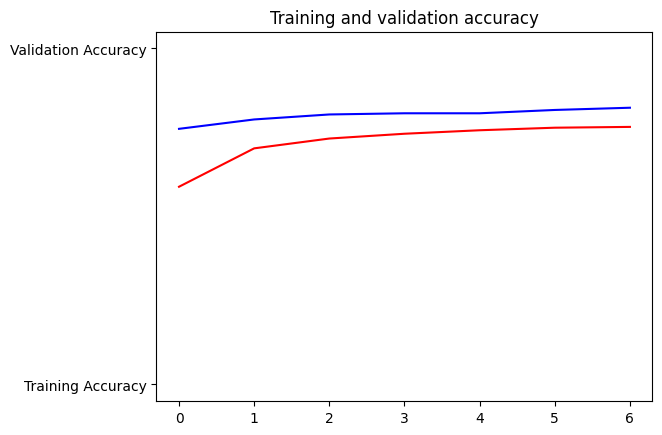

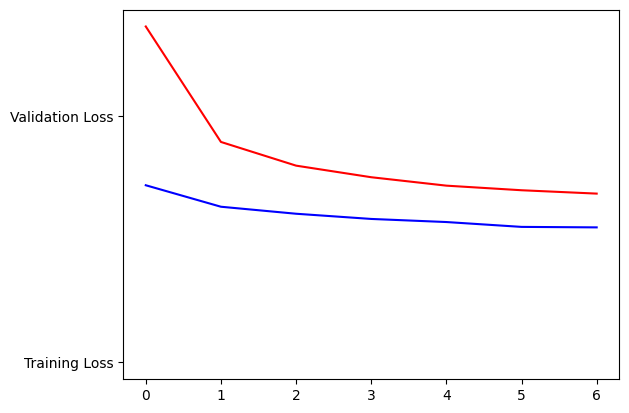

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# Test Model

We evaluate the model by using `testing_generator` to know how well the accuracy is in terms of predicting images.

In [ ]:
loss = model.evaluate(testing_generator, steps=10)

10/10 [==============================] - 22s 2s/step - loss: 0.5177 - accuracy: 0.8188


# Save and Convert Model

The next step is save the model to Google Drive using `tf.saved_model.save` and convert the model to TensorFlow Lite using `tf.lite.TFLiteConverter.from_saved_model`. 

In [ ]:
#Define saved model path
saved_model_path = "/content/drive/MyDrive/Capstone Bangkit 2023/saved_model"
tf.saved_model.save(model, saved_model_path)

#Convert the model
converted_model = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converted_model.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converted_model.convert()

#Save the model
os.makedirs('/content/drive/MyDrive/Capstone Bangkit 2023/model_tflite')
with open('/content/drive/MyDrive/Capstone Bangkit 2023/tflite_model.tflite', 'wb') as file:
  file.write(tflite_model)

Once the files are already downloaded, we can use the `saved_model` folder to be deployed to cloud. We don't utilize the converted TensorFlow Lite model since it's downloaded to be an archived file merely.